# Notes about the Intro to Machine Learning Project
[Marcelo Tyszler](mailto:tyszler.jobs@gmail.com)

24/Sep/2017

In this notebook I summarize my steps and findings towards the Final Project in the Intro to Machine Learning course. This is in the Scope of the Udacity Data Analyst Nanodegree.

# Choice of tools

For this project I opted for:
* Keep basic documentation and notes in the Jupyter Notebook
* Save files in Github
* Use PyCharm as Python environment


# Initial Data Exploration
Initially I want to read all data and obtain initial summary statistics to get a feel of the full data and spot potential problems.

I first load data for all available features. According to the documentation there should be 21 features:

**financial features**: \['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

**email features**: \['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

**POI label**: \[‘poi’] (boolean, represented as integer)

In [1]:
import pickle

enron_data = pickle.load(open("final_project_dataset.pkl", "r"))

In [2]:
print "Number of Persons: " + str(len(enron_data))
print "Features per Persons: " + str(len(enron_data[enron_data.keys()[0]]))

Number of Persons: 146
Features per Persons: 21


Therefore I have 21 features about 146 persons. Let's double check the features.

In [3]:
print "List of Features:"
enron_data[enron_data.keys()[0]].keys()

List of Features:


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

This is what I expected according to the documentation

Let's double check the list of persons.

In [4]:
print "List of Persons:"
sorted(enron_data.keys())

List of Persons:


['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

I spot 2 instances that need to be removed:  *TOTAL* and *THE TRAVEL AGENCY IN THE PARK*.

In [5]:
enron_data.pop('TOTAL',0)
enron_data.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Let's see how many POIs and non-POIs are in the dataset

In [6]:
POI = 0
non_POI = 0
for person in enron_data.keys():
    if enron_data[person]['poi']:
        print person
        POI +=1
    else:
        non_POI +=1
print "\n"
print "POIs:" + str(POI)
print "non-POIs:" + str(non_POI)
print "Total:" + str(POI+non_POI)

HANNON KEVIN P
COLWELL WESLEY
RIEKER PAULA H
KOPPER MICHAEL J
SHELBY REX
DELAINEY DAVID W
LAY KENNETH L
BOWEN JR RAYMOND M
BELDEN TIMOTHY N
FASTOW ANDREW S
CALGER CHRISTOPHER F
RICE KENNETH D
SKILLING JEFFREY K
YEAGER F SCOTT
HIRKO JOSEPH
KOENIG MARK E
CAUSEY RICHARD A
GLISAN JR BEN F


POIs:18
non-POIs:126
Total:144


Lets get a feel for the data and print the data for some people

In [7]:
test_keys = range(0,5)

for key in test_keys:
    print enron_data.keys()[key]
    print(enron_data[enron_data.keys()[key]])


METTS MARK
{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
BAXTER JOHN C
{'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees'

## Iniitial Feature Selection

From the small sample above I notice that certain features contain *NaN* values. In order to access the usability of certain features, I should check how many *NaN* exist, and in particular, what is the breakdown between POI and non-POI to have a sense of the bias that certain features might bring.

I'll also use the opportunity to create lists of features to be used later.

In [8]:
initial_selection_features = ['poi']
all_features = ['poi']

for feature in enron_data[enron_data.keys()[0]].keys():
    nan_poi = 0
    nan_non_poi = 0
    valid_data = 0 
    print "\n"+feature
    for person in enron_data.keys():
        if enron_data[person][feature] =='NaN':
            if enron_data[person]['poi']:
                nan_poi +=1
            else:
                nan_non_poi +=1
        else:
            valid_data +=1
    print "NaN in POIs: " + str(nan_poi) + " (" + str(round(float(nan_poi)/float(POI)*100,2))+"%)"
    print "NaN in non-POIs: " + str(nan_non_poi) + " (" + str(round(float(nan_non_poi)/float(non_POI)*100,2))+"%)"
    print "Valid: " + str(valid_data)  +" (" + str(round(float(valid_data)/float(POI+non_POI)*100,2))+"%)"
    #print "Total:" + str(valid_data+nan_poi+nan_non_poi)
    
    # Keep feature only if at least 50% is valid:
    if round(float(valid_data)/float(POI+non_POI)*100,2)>50:
        # ignore email_address, since it is just text, and poi, which must be first
        if feature !="email_address" and feature !="poi":
            initial_selection_features.append(feature)
            
    # save all features to allow for comparison:
    # ignore email_address, since it is just text, and poi, which must be first
    if feature !="email_address" and feature !="poi":
        all_features.append(feature)
    


salary
NaN in POIs: 1 (5.56%)
NaN in non-POIs: 49 (38.89%)
Valid: 94 (65.28%)

to_messages
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

deferral_payments
NaN in POIs: 13 (72.22%)
NaN in non-POIs: 93 (73.81%)
Valid: 38 (26.39%)

total_payments
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 21 (16.67%)
Valid: 123 (85.42%)

exercised_stock_options
NaN in POIs: 6 (33.33%)
NaN in non-POIs: 37 (29.37%)
Valid: 101 (70.14%)

bonus
NaN in POIs: 2 (11.11%)
NaN in non-POIs: 61 (48.41%)
Valid: 81 (56.25%)

restricted_stock
NaN in POIs: 1 (5.56%)
NaN in non-POIs: 34 (26.98%)
Valid: 109 (75.69%)

shared_receipt_with_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

restricted_stock_deferred
NaN in POIs: 18 (100.0%)
NaN in non-POIs: 109 (86.51%)
Valid: 17 (11.81%)

total_stock_value
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 19 (15.08%)
Valid: 125 (86.81%)

expenses
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 50 (39.68%)
Valid: 94 (65.28%)

loan_advances
NaN in 

From the test above, I notice that certain features are not good
candidates for the classifer.

In particular, *deferral_payments*, *restricted_stock_deferred*,*loan_advances*,
*director_fees* have very low valid points to be seriously considered.

As a general cut-off, I decide to drop any feature with less than 50% valid points
will not be considered. I kept 14 features, listed below.

In [9]:
print  initial_selection_features
print "\n Numbers of features: " + str(len(initial_selection_features))

['poi', 'salary', 'to_messages', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'from_poi_to_this_person']

 Numbers of features: 14


## Feature Creation

I do not expect *to_messages* to be any informative to identify a POI. Likewise the absolute number of messages to/from poi or shared are less likely to be explanatory than their respective share version. I make therefore the transformation and update the list of features.

In [10]:
initial_selection_features.remove('to_messages')
initial_selection_features.remove('from_messages')
initial_selection_features.remove('shared_receipt_with_poi')
initial_selection_features.remove('from_this_person_to_poi')
initial_selection_features.remove('from_poi_to_this_person')


# supporting function  
def convert_to_share(data, abs_var_name, base_var_name,new_var_name):
    for person in data.keys():
        if  data[person][abs_var_name] == "NaN" or  data[person][base_var_name] == "NaN":
            data[person][new_var_name] = "NaN"
        else:
            data[person][new_var_name] = float(data[person][abs_var_name])/float(data[person][base_var_name])

    return data
   
enron_data = convert_to_share(enron_data, 'shared_receipt_with_poi', 'to_messages','share_shared_receipt_with_poi') 
enron_data = convert_to_share(enron_data, 'from_this_person_to_poi', 'from_messages','share_from_this_person_to_poi') 
enron_data = convert_to_share(enron_data, 'from_poi_to_this_person', 'to_messages','share_from_poi_to_this_person') 

for feature in ['share_shared_receipt_with_poi','share_from_this_person_to_poi','share_from_poi_to_this_person']:
    all_features.append(feature)
    initial_selection_features.append(feature)
    nan_poi = 0
    nan_non_poi = 0
    valid_data = 0 
    print "\n"+feature
    for person in enron_data.keys():
        if enron_data[person][feature] =='NaN':
            if enron_data[person]['poi']:
                nan_poi +=1
            else:
                nan_non_poi +=1
        else:
            valid_data +=1
    print "NaN in POIs: " + str(nan_poi) + " (" + str(round(float(nan_poi)/float(POI)*100,2))+"%)"
    print "NaN in non-POIs: " + str(nan_non_poi) + " (" + str(round(float(nan_non_poi)/float(non_POI)*100,2))+"%)"
    print "Valid: " + str(valid_data)  +" (" + str(round(float(valid_data)/float(POI+non_POI)*100,2))+"%)"


share_shared_receipt_with_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

share_from_this_person_to_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

share_from_poi_to_this_person
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)


And this is how the list of features looks like:

In [11]:
print  initial_selection_features
print "\n Numbers of features: " + str(len(initial_selection_features))

['poi', 'salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'total_stock_value', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi', 'share_from_poi_to_this_person']

 Numbers of features: 12


I transform this according to feature format and check the initial listing

In [12]:
import sys
sys.path.append("./tools/") 

from feature_format import featureFormat, targetFeatureSplit
from sklearn.model_selection import train_test_split

data = featureFormat(enron_data, initial_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [13]:
# some checks
print len(data)

143


I noticed that one data point was dropped. Let's find out who, since this needs to be added to the initial list of outliers.

In [14]:
for person in enron_data.keys():
    suspect = person
    for key in enron_data[enron_data.keys()[0]].keys():
        suspect_found = True
        if (enron_data[person][key] !="NaN" and  enron_data[person][key] !=0):
            suspect_found = False
            break
    if suspect_found:
        print suspect
        break

LOCKHART EUGENE E


In [15]:
enron_data.pop('LOCKHART EUGENE E',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'share_from_poi_to_this_person': 'NaN',
 'share_from_this_person_to_poi': 'NaN',
 'share_shared_receipt_with_poi': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

Now I visualy inspect all initially selected variables:

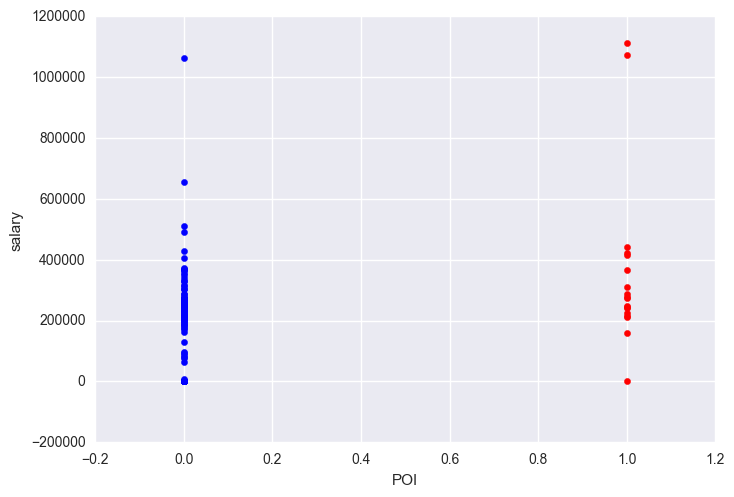

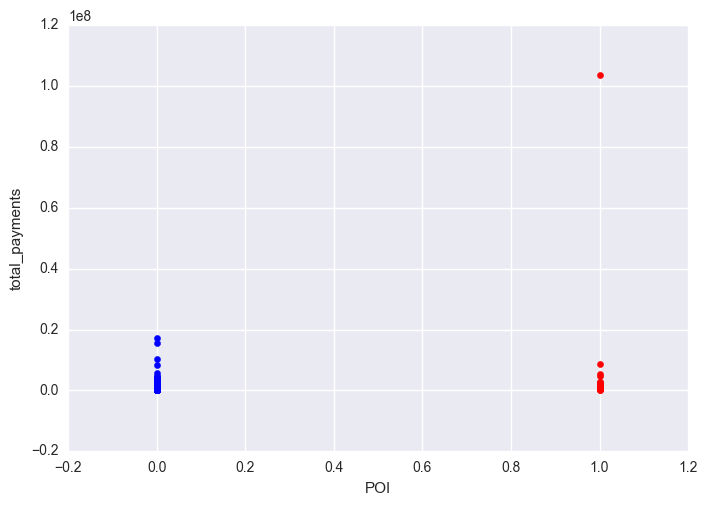

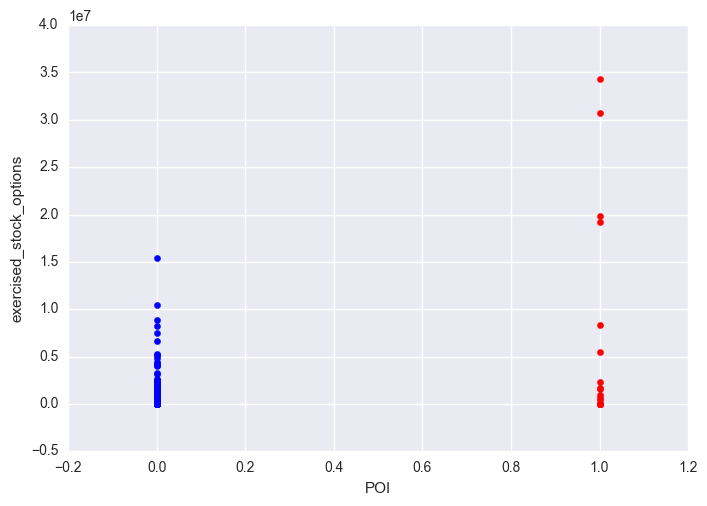

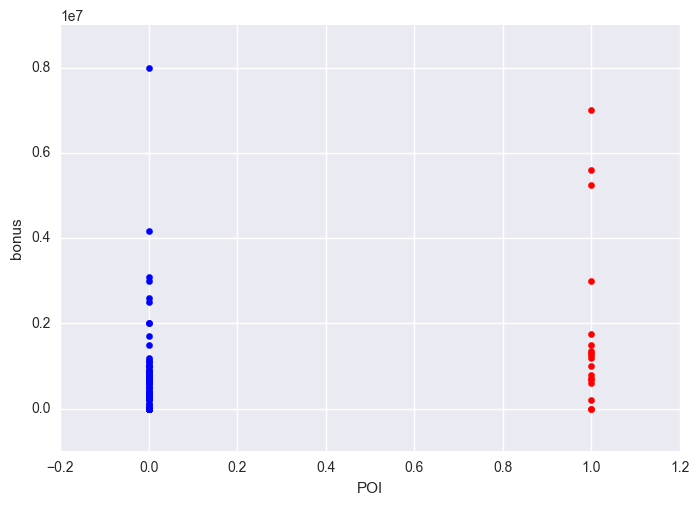

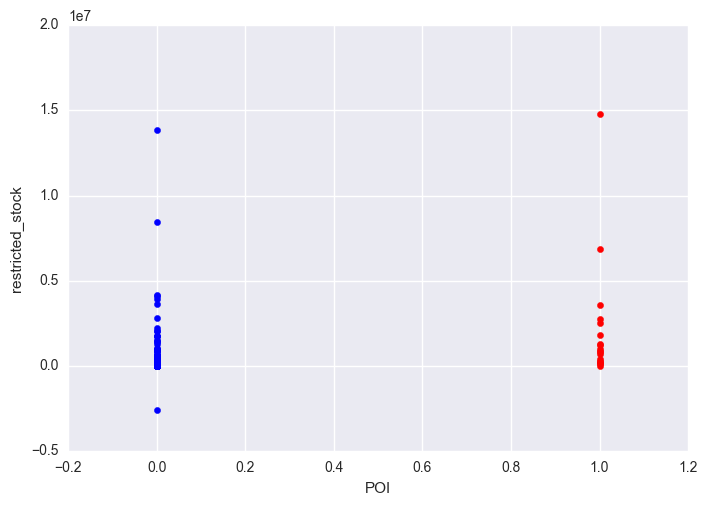

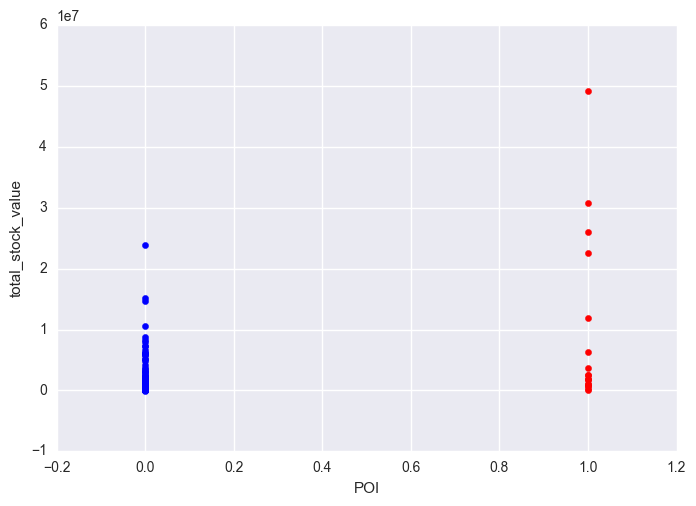

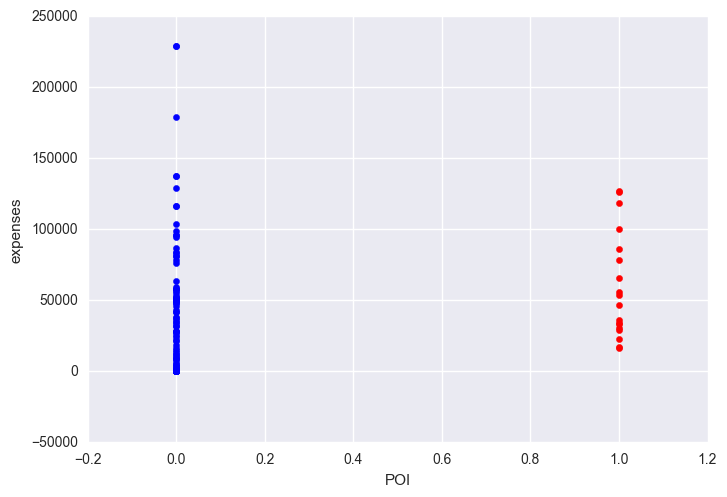

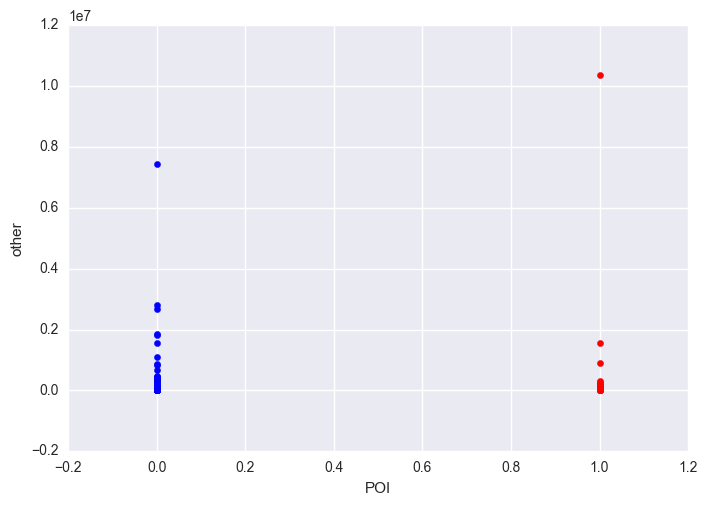

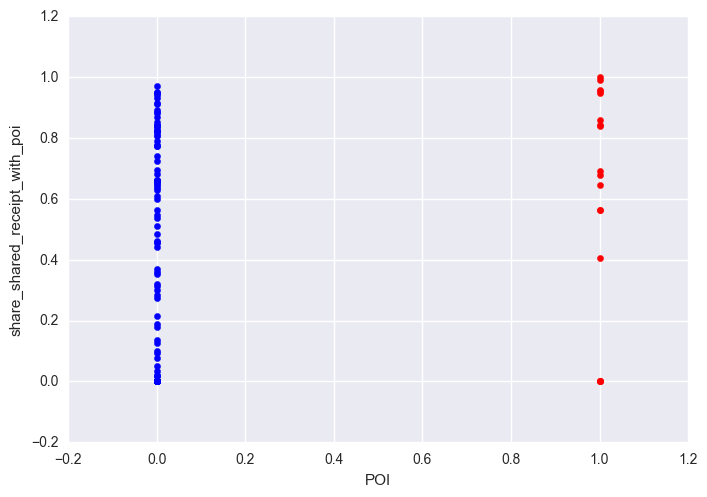

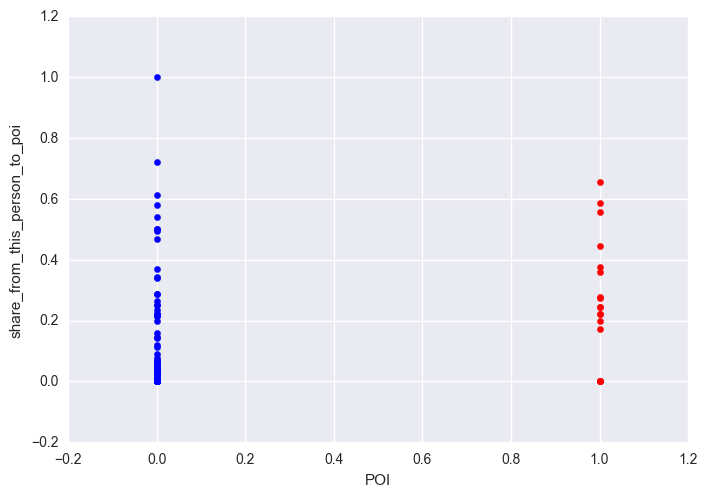

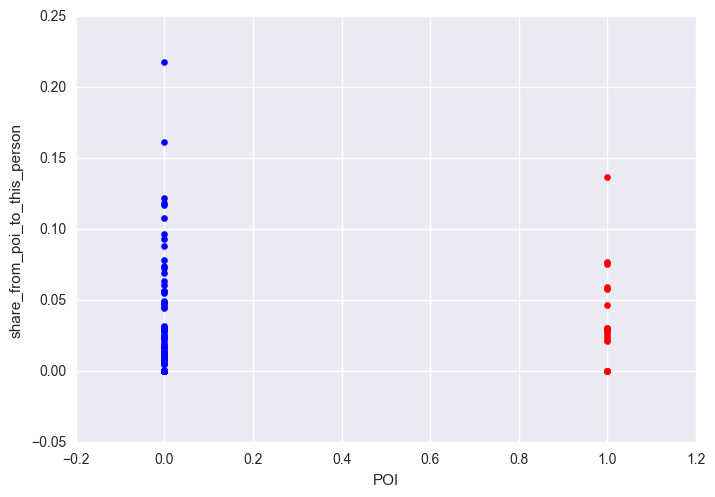

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb

for i in range(1,len(initial_selection_features)):

    for point in data:
        if point[0]==1:
            plt.scatter(point[0], point[i], color = "r")
        else:
            plt.scatter(point[0], point[i], color = "b")

    plt.xlabel('POI')
    plt.ylabel(initial_selection_features[i])
    plt
    plt.show()



I notice that *total_payments* has clear outlier. I investigate who it is

In [17]:
start = 0
suspect = ""
for person in enron_data.keys():
    if  enron_data[person]['total_payments']!= "NaN" and enron_data[person]['total_payments'] > start:
        suspect =  person
        start = enron_data[person]['total_payments']

print suspect
print start


LAY KENNETH L
103559793


# Classifier
Prepare data for classification and testing. I will test performance using the *tester.py* file provided by Udacity.

In [18]:
from tester import test_classifier

C:\Users\marcelot\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Create 4 initial classifiers

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# Naive Bayes
clf_NB = GaussianNB()

# SVM
clf_SVM = SVC()

# Decision Tree
clf_TREE = DecisionTreeClassifier()

# AdaBoost:
clf_ADA = AdaBoostClassifier()



## Compare initial performance

In [20]:
test_classifier(clf_NB, enron_data, initial_selection_features)
test_classifier(clf_SVM, enron_data, initial_selection_features)
test_classifier(clf_TREE, enron_data, initial_selection_features)
test_classifier(clf_ADA, enron_data, initial_selection_features)


GaussianNB(priors=None)
	Accuracy: 0.84707	Precision: 0.37105	Recall: 0.21150	F1: 0.26943	F2: 0.23140
	Total predictions: 15000	True positives:  423	False positives:  717	False negatives: 1577	True negatives: 12283

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81107	Precision: 0.30274	Recall: 0.32000	F1: 0.31113	F2: 0.31639
	Total predictions: 15000	True positives:  640	Fals

AdaBoost has the best performance, so we go further only with it.

Check the feature importances importances on the training set

In [21]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(initial_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.2
total_payments: 0.18
exercised_stock_options: 0.12
bonus: 0.16
restricted_stock: 0.1
total_stock_value: 0.04
expenses: 0.08
other: 0.02
share_shared_receipt_with_poi: 0.04
share_from_this_person_to_poi: 0.02
share_from_poi_to_this_person: 0.04


Tune this model, optimizing F1

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate':[0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 2,3, 5, 10],'n_estimators':[1,5,8,10,12, 14, 15, 16,50,100,1000, 2000] }
clf_ADA = AdaBoostClassifier()
clf = GridSearchCV(clf_ADA, parameters, scoring = 'f1', cv = 10 )
clf.fit(features, labels)

C:\Users\marcelot\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 8, 10, 12, 14, 15, 16, 50, 100, 1000, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [23]:
print clf.best_params_
print clf.best_score_ 

{'n_estimators': 15, 'learning_rate': 0.9}
0.477855477855


Double check performance of the best model, and obtain the other metrics:

In [24]:
lr = 0.9
n_est = 15
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, initial_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.87120	Precision: 0.52313	Recall: 0.38450	F1: 0.44323	F2: 0.40602
	Total predictions: 15000	True positives:  769	False positives:  701	False negatives: 1231	True negatives: 12299



Check the feature importances importances on the training set

In [25]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(initial_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.13
total_payments: 0.2
exercised_stock_options: 0.07
bonus: 0.27
restricted_stock: 0.13
total_stock_value: 0.0
expenses: 0.07
other: 0.07
share_shared_receipt_with_poi: 0.07
share_from_this_person_to_poi: 0.0
share_from_poi_to_this_person: 0.0


In [26]:
### Check sub-set of features

Let's see how the performance compares if we drop the features with 0 importance:

In [27]:
second_selection_features = initial_selection_features

In [28]:
second_selection_features.remove('share_from_this_person_to_poi')
second_selection_features.remove('share_from_poi_to_this_person')
second_selection_features.remove('total_stock_value')

In [29]:
print  second_selection_features
print "\n Numbers of features: " + str(len(second_selection_features))

['poi', 'salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'expenses', 'other', 'share_shared_receipt_with_poi']

 Numbers of features: 9


Re-create relevant variables

In [30]:
data = featureFormat(enron_data, second_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [31]:
test_classifier(clf_ADA, enron_data, second_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.86827	Precision: 0.50797	Recall: 0.38250	F1: 0.43639	F2: 0.40238
	Total predictions: 15000	True positives:  765	False positives:  741	False negatives: 1235	True negatives: 12259



The performance is noticeable reduced, particularly the precision. Therefore we stop this investigation and stick with the *initial_selection_features* list

# Alternative Feature Selection

In this case I will start with the full list of features including the created festures, and use recursive feature elimination (RFE) to select the 11 best features from the full list and compare performance the performance against my manually selected features.

In [32]:
from sklearn.feature_selection import RFE

In [33]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [34]:
rfe = RFE(clf_ADA,11)
selector = rfe.fit(features,labels)

In [35]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (12)
to_messages (11)
deferral_payments (10)
total_payments (1)
exercised_stock_options (1)
bonus (6)
restricted_stock (1)
shared_receipt_with_poi (1)
restricted_stock_deferred (5)
total_stock_value (4)
expenses (1)
loan_advances (8)
from_messages (9)
other (1)
from_this_person_to_poi (3)
director_fees (2)
deferred_income (1)
long_term_incentive (1)
from_poi_to_this_person (1)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (7)


In [36]:
alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        alternative_selection_features.append(feature)

In [37]:
print  alternative_selection_features
print "\n Numbers of features: " + str(len(alternative_selection_features))

['poi', 'total_payments', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi', 'expenses', 'other', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 12


Re-create relevant variables

In [38]:
data = featureFormat(enron_data, alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [39]:
test_classifier(clf_ADA, enron_data, alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.87600	Precision: 0.54755	Recall: 0.40300	F1: 0.46429	F2: 0.42546
	Total predictions: 15000	True positives:  806	False positives:  666	False negatives: 1194	True negatives: 12334



We notice an important increase in performance, therefore we proceed in this path. Let's check the importance of features.

In [40]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

total_payments: 0.2
exercised_stock_options: 0.2
restricted_stock: 0.2
shared_receipt_with_poi: 0.07
expenses: 0.13
other: 0.07
deferred_income: 0.0
long_term_incentive: 0.0
from_poi_to_this_person: 0.07
share_shared_receipt_with_poi: 0.07
share_from_this_person_to_poi: 0.0


Since there are 3 feature with close to 0 importance, we investigate if we can drop features.

In [41]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

rfe = RFE(clf_ADA,8)
selector = rfe.fit(features,labels)

In [42]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (15)
to_messages (14)
deferral_payments (13)
total_payments (2)
exercised_stock_options (1)
bonus (9)
restricted_stock (1)
shared_receipt_with_poi (1)
restricted_stock_deferred (8)
total_stock_value (7)
expenses (1)
loan_advances (11)
from_messages (12)
other (1)
from_this_person_to_poi (6)
director_fees (5)
deferred_income (4)
long_term_incentive (3)
from_poi_to_this_person (1)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (10)


In [43]:
second_alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        second_alternative_selection_features.append(feature)

In [44]:
print  second_alternative_selection_features
print "\n Numbers of features: " + str(len(second_alternative_selection_features))

['poi', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi', 'expenses', 'other', 'from_poi_to_this_person', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 9


Re-create relevant variables

In [45]:
data = featureFormat(enron_data, second_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


and test performance

In [46]:
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.87913	Precision: 0.56571	Recall: 0.40250	F1: 0.47035	F2: 0.42715
	Total predictions: 15000	True positives:  805	False positives:  618	False negatives: 1195	True negatives: 12382



Performance is again improved, therefore we can investigate further. Let's see the importance again.

In [47]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.2
restricted_stock: 0.13
shared_receipt_with_poi: 0.07
expenses: 0.13
other: 0.13
from_poi_to_this_person: 0.13
share_shared_receipt_with_poi: 0.07
share_from_this_person_to_poi: 0.13


There is one feature with close to 0 importance. Let's see what happens if we drop an additional feature.

In [48]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

rfe = RFE(clf_ADA,7)
selector = rfe.fit(features,labels)

In [49]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (16)
to_messages (15)
deferral_payments (14)
total_payments (3)
exercised_stock_options (1)
bonus (10)
restricted_stock (1)
shared_receipt_with_poi (1)
restricted_stock_deferred (9)
total_stock_value (8)
expenses (2)
loan_advances (12)
from_messages (13)
other (1)
from_this_person_to_poi (7)
director_fees (6)
deferred_income (5)
long_term_incentive (4)
from_poi_to_this_person (1)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (11)


In [50]:
third_alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        third_alternative_selection_features.append(feature)

In [51]:
print  third_alternative_selection_features
print "\n Numbers of features: " + str(len(third_alternative_selection_features))

['poi', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi', 'other', 'from_poi_to_this_person', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 8


Re-create relevant variables

In [52]:
data = featureFormat(enron_data, third_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [53]:
test_classifier(clf_ADA, enron_data, third_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.84443	Precision: 0.43921	Recall: 0.32150	F1: 0.37125	F2: 0.33971
	Total predictions: 14000	True positives:  643	False positives:  821	False negatives: 1357	True negatives: 11179



Performance is reduced. Therefore we stay with the *second_alternative_selection_features*

Final thing we can do is to manually remove the single feature with near 0 importance and compare performance.

In [54]:
forth_alternative_selection_features = second_alternative_selection_features
forth_alternative_selection_features.remove('from_poi_to_this_person')

In [55]:
print  forth_alternative_selection_features
print "\n Numbers of features: " + str(len(forth_alternative_selection_features))

['poi', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 8


Re-create relevant variables

In [56]:
data = featureFormat(enron_data, forth_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [57]:
test_classifier(clf_ADA, enron_data, forth_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.88773	Precision: 0.61400	Recall: 0.42550	F1: 0.50266	F2: 0.45333
	Total predictions: 15000	True positives:  851	False positives:  535	False negatives: 1149	True negatives: 12465



This clearly improved performance. Let's see the importance:

In [58]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(forth_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.13
restricted_stock: 0.07
shared_receipt_with_poi: 0.07
expenses: 0.2
other: 0.13
share_shared_receipt_with_poi: 0.2
share_from_this_person_to_poi: 0.2


## Best option

In [59]:
print  forth_alternative_selection_features
print "\n Numbers of features: " + str(len(forth_alternative_selection_features))

['poi', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 8


### Double Check tune

In [60]:
data = featureFormat(enron_data, forth_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [61]:
clf_ADA = AdaBoostClassifier()
clf = GridSearchCV(clf_ADA, parameters, scoring = 'f1', cv = 10 )
clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 8, 10, 12, 14, 15, 16, 50, 100, 1000, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [62]:
print clf.best_params_
print clf.best_score_ 

{'n_estimators': 8, 'learning_rate': 0.9}
0.497635933806


In [63]:
lr = 0.9
n_est = 8
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=8, random_state=None)
	Accuracy: 0.88600	Precision: 0.61258	Recall: 0.39450	F1: 0.47993	F2: 0.42474
	Total predictions: 15000	True positives:  789	False positives:  499	False negatives: 1211	True negatives: 12501



In [64]:
lr = 0.9
n_est = 15
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)
	Accuracy: 0.88780	Precision: 0.61428	Recall: 0.42600	F1: 0.50310	F2: 0.45382
	Total predictions: 15000	True positives:  852	False positives:  535	False negatives: 1148	True negatives: 12465



We see that the best parameters are indeed *learning_rate = 0.9* and *n_estimators = 15*